# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 11</span>

In questa esercitazione è richiesto di effettuare un fit su alcune funzioni, esplorando diverse strutture di reti neurali (*NN, Neural Network*). Consideriamo un processo probabilistico in cui generiamo dati dall'equazione: $ y_i= f(x_i) + \eta_i$, con $\eta_i$ rumore di tipo gaussiano. Per fare predizioni su tale relazione, consideriamo una rete neurale che dipende dai parametri dell'equazione. È necessario allenare la rete su un set di dati di *train* e poi testarne l'efficienza su un set diverso, detto di *validation*. Dividiamo i dati in questi due gruppi poichè il *machine learning* intende fare predizioni accurate su un set di dati mai visti. Per misurare l'abilità della rete di predire il risultato, una volta allenata sul set di *train*, si usa una funzione detta *loss*. Comunemente è usato il *mean square error*: $$MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2\ ,$$
in cui {$y_j^\mathrm{pred}$} sono le predizioni e {$y_j$} sono i valori veri. La rete neurale sarà più performante man mano che si va a minimizzare la *loss*.

## 11.1

Nel primo esercizio si richiede di fare un fit della funzione lineare $f(x) = 2x + 1$ con $x \in [-1,1]$. Ho variato $N_{train}$, il numero dei dati del set di *train*, $N_{epoch}$ ovvero il numero delle epoche su cui allenare la rete e il rumore gaussiano $\sigma$. Ho implementato una funzione che costruisse la rete neurale e che prende in ingresso questi tre parametri, in modo da variarli e da osservare con facilità i risultati. Ho considerato diversi modelli che di seguito elenco.

Ho trovato che il modello più accurato è il primo, poichè è quello che riesce a minimizzare meglio la *loss*:

$\sigma = 0.1$, $N_{train} = 500$, $N_{epochs} = 50$, $N_{valid} = 50$ .

È interessante vedere che un numero grande di epoche non sempre dà il risultato più accurato. Si rischia infatti l'*overfit*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

def lin_NN (sigma, Ntrain, Nepochs): #inserisco Ntrain ed Nvalid sarà Ntrain/10
    
    m = 2 # slope
    b = 1 # intersect
    
    np.random.seed(0)
    Ntrain = (int)(Ntrain)
    x_train = np.random.uniform(-1, 1, Ntrain)
    Nvalid = (int)(Ntrain/10)
    x_valid = np.random.uniform(-1, 1, Nvalid)
    x_valid.sort()
    y_target = m * x_valid + b

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    
    # plot training and target dataset
    plt.title('Grafico del dataset di training e di target')
    plt.plot(x_valid, y_target)
    plt.scatter(x_valid, y_valid, color='r')
    plt.grid(True); plt.show()
    
    # compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    ### model.summary()
    
    history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)
    
    ### model.get_weights()
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    print()
    print('Modello valutato con il set di validation:')
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print()
    print('Modello valutato con la curva esatta:')
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.title('Predicted dataset')
    plt.scatter(x_predicted, y_predicted,color='r')
    plt.plot(x_valid, y_target)
    plt.grid(True)
    plt.show()

Ho dapprima fatto 4 modelli in cui ho variato solo il valore di $\sigma$, mantenendo lo stesso numero di dati di *train* e di epoche:

**Modello 1**
$\sigma = 0.1$, $N_{train} = 500$, $N_{epochs} = 50$, $N_{valid} = 50$

**Modello 2**
$\sigma = 0.4$, $N_{train} = 500$, $N_{epochs} = 50$

**Modello 3**
$\sigma = 0.7$, $N_{train} = 500$, $N_{epochs} = 50$

**Modello 4**
$\sigma = 1.$, $N_{train} = 500$, $N_{epochs} = 50$

Ho quindi osservato che il modello con la migliore accuratezza rispetto al dataset di target è quello con il valore più basso di $\sigma$ .

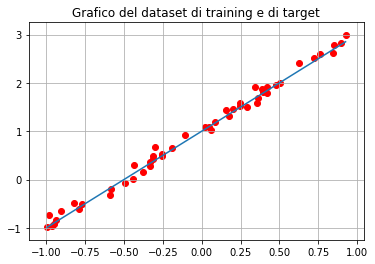


Modello valutato con il set di validation:
Test loss: 0.011107430979609489
Test accuracy: 0.011107431

Modello valutato con la curva esatta:
Test loss: 0.00011664924124488607
Test accuracy: 0.000116649244


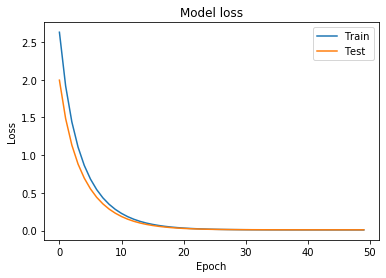

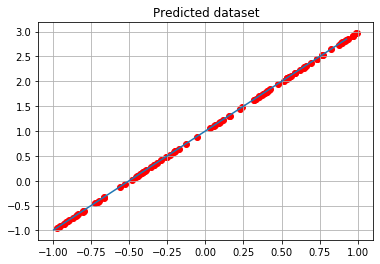

In [2]:
lin_NN (0.1, 500, 50)

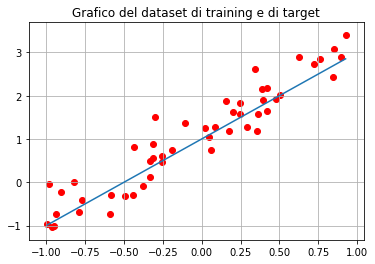


Modello valutato con il set di validation:
Test loss: 0.1783156657218933
Test accuracy: 0.17831565

Modello valutato con la curva esatta:
Test loss: 0.002461541232187301
Test accuracy: 0.0024615412


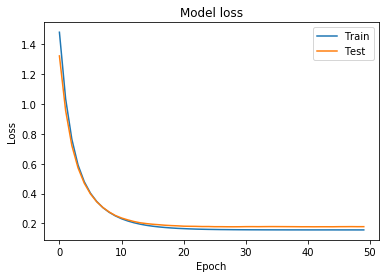

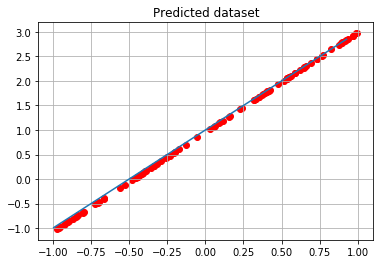

In [3]:
lin_NN(0.4, 500, 50)

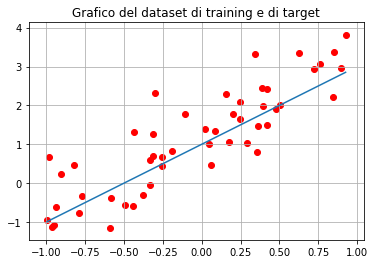


Modello valutato con il set di validation:
Test loss: 0.5452108597755432
Test accuracy: 0.5452109

Modello valutato con la curva esatta:
Test loss: 0.007570518567226827
Test accuracy: 0.007570518


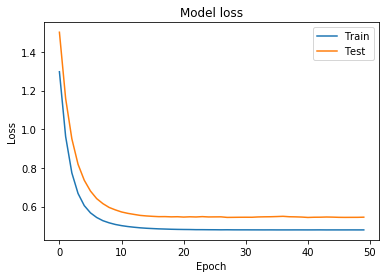

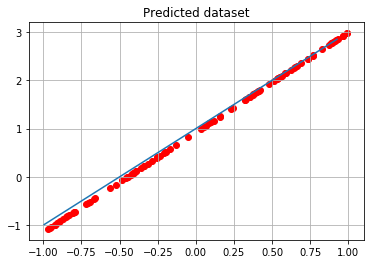

In [4]:
lin_NN(0.7, 500, 50)

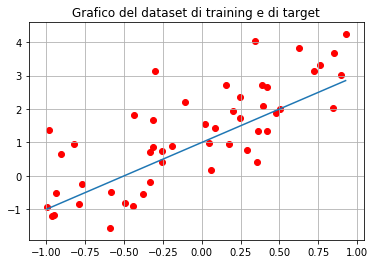


Modello valutato con il set di validation:
Test loss: 1.1197827291488647
Test accuracy: 1.1197827

Modello valutato con la curva esatta:
Test loss: 0.01686966134235263
Test accuracy: 0.016869662


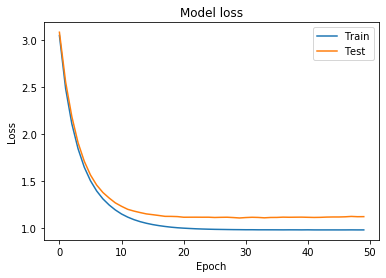

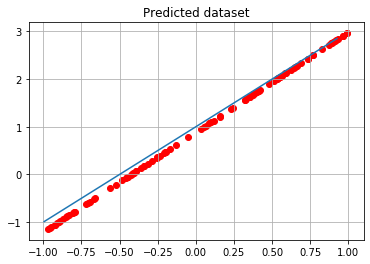

In [5]:
lin_NN(1., 500, 50)

Ho inizato poi a variare il numero di dati di *train* (e di conseguenza anche quelli di *validation* di un fattore $10$). Ho mantenuto un valore di $\sigma = 0.1$.

**Modello 5**
$\sigma = 0.1$, $N_{train} = 100$, $N_{epochs} = 50$, $N_{valid} = 10$

**Modello 6**
$\sigma = 0.1$, $N_{train} = 200$, $N_{epochs} = 50$, $N_{valid} = 20$

**Modello 7**
$\sigma = 0.1$, $N_{train} = 300$, $N_{epochs} = 50$, $N_{valid} = 30$

**Modello 8**
$\sigma = 0.1$, $N_{train} = 400$, $N_{epochs} = 50$, $N_{valid} = 40$

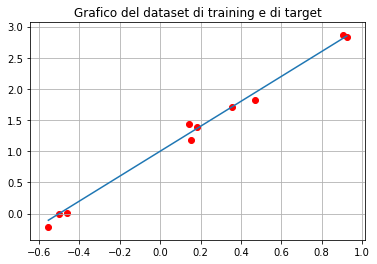


Modello valutato con il set di validation:
Test loss: 0.3059110641479492
Test accuracy: 0.30591106

Modello valutato con la curva esatta:
Test loss: 0.28829091787338257
Test accuracy: 0.28829092


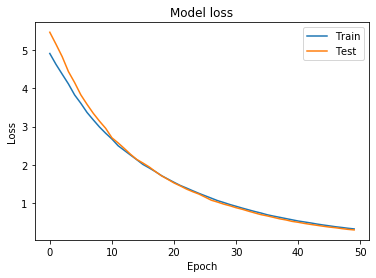

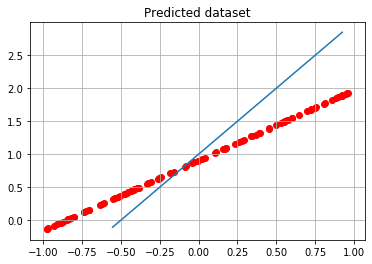

In [6]:
lin_NN(0.1, 100, 50)

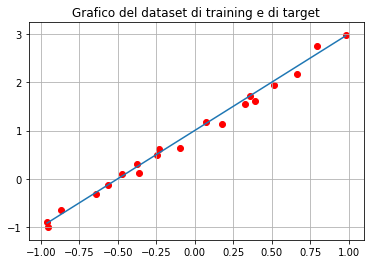


Modello valutato con il set di validation:
Test loss: 0.01124462578445673
Test accuracy: 0.011244626

Modello valutato con la curva esatta:
Test loss: 0.0010333647951483727
Test accuracy: 0.0010333648


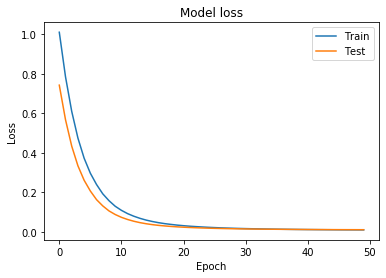

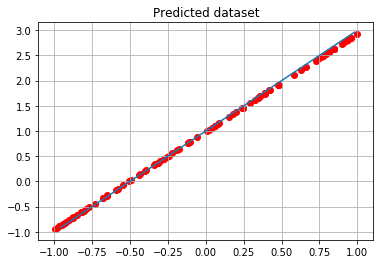

In [7]:
lin_NN(0.1, 200, 50)

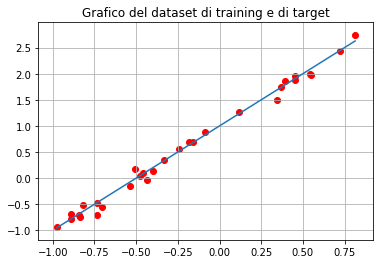


Modello valutato con il set di validation:
Test loss: 0.011023289524018764
Test accuracy: 0.0110232895

Modello valutato con la curva esatta:
Test loss: 0.0015228382544592023
Test accuracy: 0.0015228383


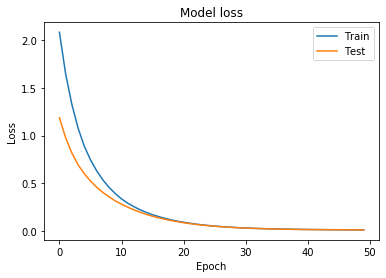

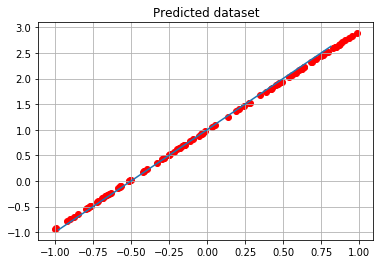

In [8]:
lin_NN(0.1, 300, 50)

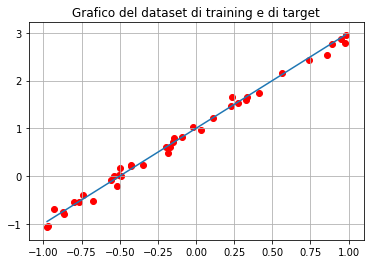


Modello valutato con il set di validation:
Test loss: 0.008202545158565045
Test accuracy: 0.008202545

Modello valutato con la curva esatta:
Test loss: 0.0004715322982519865
Test accuracy: 0.0004715323


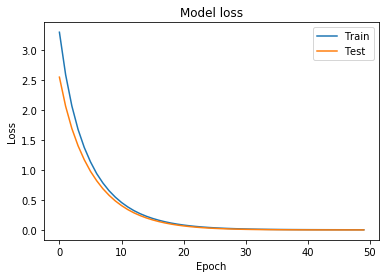

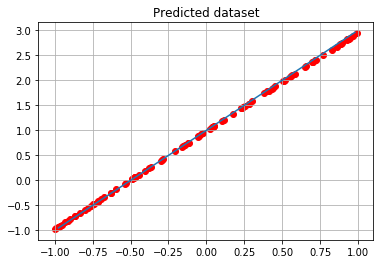

In [9]:
lin_NN(0.1, 400, 50)

Ho infine variato il numero di epoche di allenamento della rete neurale.

**Modello 9**
$\sigma = 0.1$, $N_{train} = 500$, $N_{epochs} = 20$, $N_{valid} = 50$

**Modello 10**
$\sigma = 0.1$, $N_{train} = 500$, $N_{epochs} = 40$, $N_{valid} = 50$

**Modello 11**
$\sigma = 0.1$, $N_{train} = 500$, $N_{epochs} = 70$, $N_{valid} = 50$

**Modello 12**
$\sigma = 0.1$, $N_{train} = 500$, $N_{epochs} = 100$, $N_{valid} = 50$

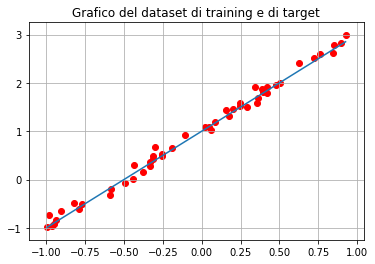


Modello valutato con il set di validation:
Test loss: 0.02763702139258385
Test accuracy: 0.027637022

Modello valutato con la curva esatta:
Test loss: 0.016465970873832704
Test accuracy: 0.016465971


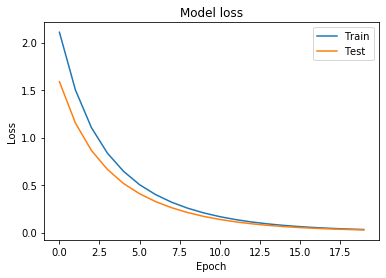

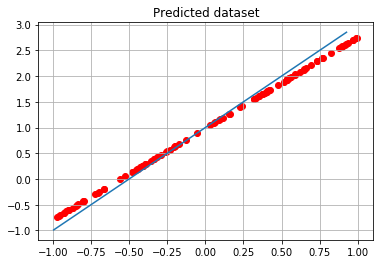

In [10]:
lin_NN(0.1, 500, 20)

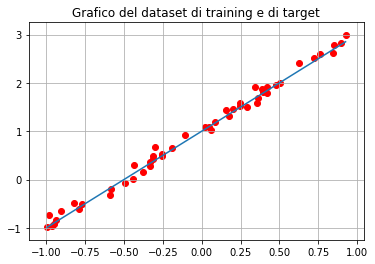


Modello valutato con il set di validation:
Test loss: 0.011353000923991203
Test accuracy: 0.011353002

Modello valutato con la curva esatta:
Test loss: 0.0003113277908414602
Test accuracy: 0.0003113278


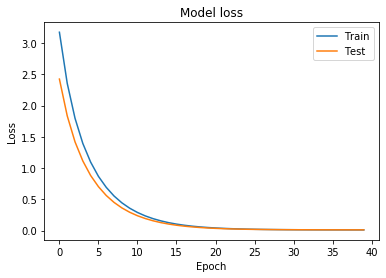

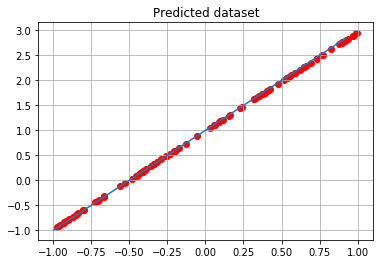

In [11]:
lin_NN(0.1, 500, 40)

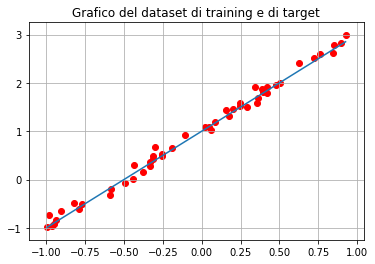


Modello valutato con il set di validation:
Test loss: 0.011151828914880752
Test accuracy: 0.011151829

Modello valutato con la curva esatta:
Test loss: 0.00015312235031160525
Test accuracy: 0.00015312235


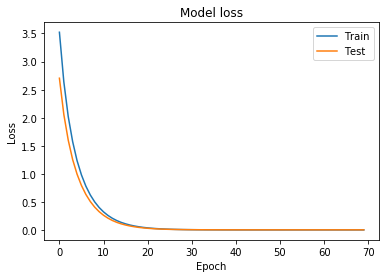

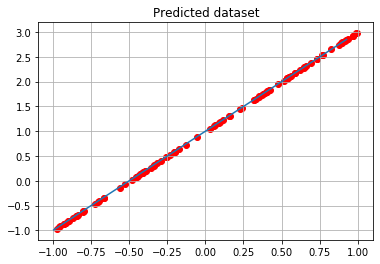

In [12]:
lin_NN(0.1, 500, 70)

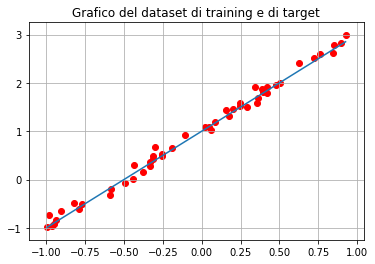


Modello valutato con il set di validation:
Test loss: 0.01117019411176443
Test accuracy: 0.0111701945

Modello valutato con la curva esatta:
Test loss: 0.00016767941531725227
Test accuracy: 0.00016767942


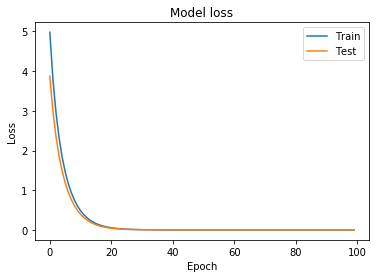

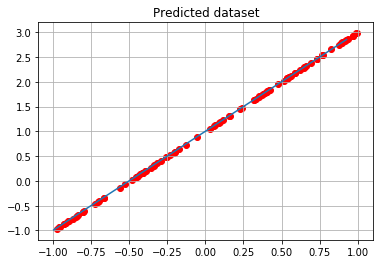

In [13]:
lin_NN(0.1, 500, 100)